# Dataset info

From Wikipedia:
*"The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. "*

https://en.wikipedia.org/wiki/MNIST_database

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("mnist_train.csv")
data.shape

(60000, 785)

In [2]:
# First 5k rows due to processing speed.
data = data.iloc[0:5000,:]
data.shape

(5000, 785)

In [3]:
# Target
y = data.pop("label")

# Size (10k)
m = y.size

X = data

# Add intercept (x_0)
X = np.hstack((np.ones((m,1)),X))

# Check shapes
print("y shape:", y.shape)
print("X + intercept shape:", X.shape)

y shape: (5000,)
X + intercept shape: (5000, 785)


/home/fabs/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


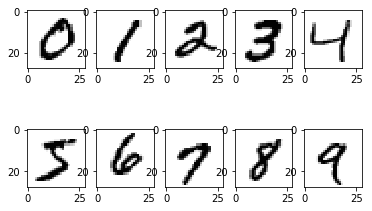

In [4]:
# Visualizing characters 
data = np.array(data)
fig, ax = plt.subplots(2,5)
ax = ax.flatten()
for i in range(10):
    im_idx = np.argwhere(y == i)[0]
    plottable_image = np.reshape(data[im_idx], (28, 28))
    ax[i].imshow(plottable_image, cmap='gray_r')

In [5]:
# Splitting & Shuffling test/train data.

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [6]:
# Functions

def get_hypothesis(X, theta):
    z = np.dot(X,theta)
    return 1.0/(1+np.exp(-z))

def cross_entropy(hypothesis, y):
    return (-y * np.log(hypothesis) - (1 - y) * np.log(1 - hypothesis)).mean()

def gradient_descent(X,y,theta, learning_rate, iterations):
    # Stores last iteration cost
    temp_cost =[]
    for i in range(1, iterations):
        hypothesis = get_hypothesis(X, theta)
        loss = hypothesis - y.ravel()
        gradient = (1/m) * np.dot(X.T, loss)
        # Updating coefficients 
        theta = theta - learning_rate * gradient
        cost = cross_entropy(hypothesis, y)
        # temp_cost index
        if i%1000 ==0:
            print("Iteration:",i,"Cost:", cost)
        b = i-1
        temp_cost.append(cost)
        if temp_cost[b]<cost:break
        # Print Cost every 1000th iteration
    return theta
    

In [7]:
# Coding targets per classifier

zero_target = np.array(yTrain.replace(to_replace = [0,1,2,3,4,5,6,7,8,9], value = [1,0,0,0,0,0,0,0,0,0]))
one_target = np.array(yTrain.replace(to_replace = [0,1,2,3,4,5,6,7,8,9], value = [0,1,0,0,0,0,0,0,0,0]))
two_target = np.array(yTrain.replace(to_replace = [0,1,2,3,4,5,6,7,8,9], value = [0,0,1,0,0,0,0,0,0,0]))
three_target = np.array(yTrain.replace(to_replace = [0,1,2,3,4,5,6,7,8,9], value = [0,0,0,1,0,0,0,0,0,0]))
four_target = np.array(yTrain.replace(to_replace = [0,1,2,3,4,5,6,7,8,9], value = [0,0,0,0,1,0,0,0,0,0]))
five_target = np.array(yTrain.replace(to_replace = [0,1,2,3,4,5,6,7,8,9], value = [0,0,0,0,0,1,0,0,0,0]))
six_target = np.array(yTrain.replace(to_replace = [0,1,2,3,4,5,6,7,8,9], value = [0,0,0,0,0,0,1,0,0,0]))
seven_target = np.array(yTrain.replace(to_replace = [0,1,2,3,4,5,6,7,8,9], value = [0,0,0,0,0,0,0,1,0,0]))
eight_target = np.array(yTrain.replace(to_replace = [0,1,2,3,4,5,6,7,8,9], value = [0,0,0,0,0,0,0,0,1,0]))
nine_target = np.array(yTrain.replace(to_replace = [0,1,2,3,4,5,6,7,8,9], value = [0,0,0,0,0,0,0,0,0,1]))

In [9]:
# Listing targets
targets = [zero_target,one_target,two_target,three_target,four_target,five_target,six_target,seven_target, eight_target, nine_target]

# Initiating theta (coefficients)
initial_theta = np.zeros(xTrain.shape[1])

learning_rate = 0.00001
iterations = 2000

theta_matrix = []
for target in targets:
    theta_matrix.append(gradient_descent(xTrain, target, initial_theta, learning_rate, iterations))

# Run get_hypothesis with the found thetas - Training
probability_per_class_training = pd.DataFrame(get_hypothesis(theta_matrix, xTrain.T))

# Get the highest value per row, return column number - Training
results_training = probability_per_class_training.T.idxmax(axis =1)

# Run get_hypothesis with the found thetas - Test
probability_per_class_test = pd.DataFrame(get_hypothesis(theta_matrix, xTest.T))

# Get the highest value per row, return column number - Test
results_test = probability_per_class_test.T.idxmax(axis =1)

Iteration: 1000 Cost: 0.019885499974928236
Iteration: 1000 Cost: 0.024088136747771324
Iteration: 1000 Cost: 0.06026047506219357
Iteration: 1000 Cost: 0.07023518225790153
Iteration: 1000 Cost: 0.04788382405292512
Iteration: 1000 Cost: 0.061362033755611424
Iteration: 1000 Cost: 0.031650994216474854
Iteration: 1000 Cost: 0.036334268815031344
Iteration: 1000 Cost: 0.11220012845492999
Iteration: 1000 Cost: 0.0939312997944439


In [10]:
# array'ing for easier indexing
yTrain =np.array(yTrain)
yTest =np.array(yTest)

In [11]:
# Checking accuracy

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
 
def accuracy(true_y, predicted_y):
    results = confusion_matrix(true_y, predicted_y) 
    print ('Confusion Matrix:\n')
    print(results) 
    print ('Accuracy Score:',accuracy_score(true_y, predicted_y))
    print ('Report:\n')
    print (classification_report(true_y, predicted_y))
    
print(" ------- TRAINING SET ACCURACY -------")
accuracy(yTrain, results_training)

 ------- TRAINING SET ACCURACY -------
Confusion Matrix:

[[390   0   0   0   1   0   1   0   1   0]
 [  0 446   2   0   0   1   0   0   3   0]
 [  2   3 357   0   3   2   0   3  12   2]
 [  0   1   7 370   1   6   1   3   2   3]
 [  0   2   1   0 429   0   3   0   1   9]
 [  3   1   3   8   3 312   3   0   4   6]
 [  1   2   0   0   0   2 394   0   1   0]
 [  0   2   2   0   4   0   0 409   1   9]
 [  0   3   3   5   2   3   1   1 340   3]
 [  3   2   2   3   4   2   0  10   4 371]]
Accuracy Score: 0.9545
Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       393
           1       0.97      0.99      0.98       452
           2       0.95      0.93      0.94       384
           3       0.96      0.94      0.95       394
           4       0.96      0.96      0.96       445
           5       0.95      0.91      0.93       343
           6       0.98      0.98      0.98       400
           7       0.96      0.96      0.96   

In [12]:
print(" ------- TEST SET ACCURACY -------")
accuracy(yTest, results_test)

 ------- TEST SET ACCURACY -------
Confusion Matrix:

[[ 86   0   0   0   0   0   0   0   0   0]
 [  0 107   0   1   0   0   0   0   3   0]
 [  1   2  93   1   2   0   1   1   2   1]
 [  0   1   5  81   0   7   0   3   1   1]
 [  1   0   1   0  85   0   0   0   1   2]
 [  0   0   0   5   0  74   1   1   6   4]
 [  1   0   0   0   0   1  99   0   0   0]
 [  0   2   1   0   3   0   1 111   1   4]
 [  1   7   0   3   2   4   3   1  77   3]
 [  0   0   0   0   2   0   1   7   0  84]]
Accuracy Score: 0.897
Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        86
           1       0.90      0.96      0.93       111
           2       0.93      0.89      0.91       104
           3       0.89      0.82      0.85        99
           4       0.90      0.94      0.92        90
           5       0.86      0.81      0.84        91
           6       0.93      0.98      0.96       101
           7       0.90      0.90      0.90       1

## Results

aprox 90% accuracy on new data. Can be improved with more samples, smaller learning rate, regularization and more iterations.